# This is a duplicate from the original data quality preperations. This is for the provided dataset for the second assignment as it needs to be cleaned. Please ignore this file.

# Data Analytics Assignment 2 - Data Quality Preperation

In this section, I will prepare a cleaned dataset provided in the zip file. 

**Introduction:**
<br><br>
I will create a cleaned dataset provided by the csv in the zip file. I will briefly introduce the dataset and talk about the different features that is present. We have 12 features present. The data are information about patients with some clinical data provided such as their symptoms. As we move to clean this dataset, the documentation states that these information are subjected to change, meaning that some data are to be verified by the CDC. 
<br><br>
The documentation states that routinely performs data quality assurances to make sure logic checks are implemented. I will list steps that have been taken to clean data in this dataset already and I will mention this in the notebook further if such an occassion arises:
* Features that have "Missing" have been treated as a seperate category as it means the question has been left unanswered and willl be treated as such.
* "Unknown" is one of the choices for one of the questions in the form and so if it appears in the dataset it will be treated as it's own. 
* Some logical checks have been implemented, though only one has been included which is that if an illogical date has been given the CDC reviews the data. 
* It is important to note that some data levels are suppressed to hide the identity of some patients and they are re-coded as NA. These are never removed. 
<br><br>
_The 12 features are self explanatory._ 
* cdc_case_earliest_dt are dates that are related to Covid-19 or specimen collection, where the date may have been from when a case was reported to the CDC and they had recevied it. It is an option to end-users who need a date variable with optimized completeness. Meaning that if one of the dates are left blank, then use the earliest date available and if none are available it should be left blank.
* cdc_report_dt are dates when the case was first reported to the CDC. It is populated using date when a case was first recorded to the database. If missing, then the reported date entered on the case report form was used. If missing then "the date at which the case first appeared in the database was used. If none available, then left blank." (taken from website) This means that the missing values mean that the data is being used.
* pos_spec_dt are dates when the first positive specimen collection. Specimen collection refers to a test, and so they are the dates in which a person had their first covid-19 test that resulted in a positive result.
* onset_dt refers to the date the patient first started experiencing symptoms. "If symptomatic", meaning that missing data could entail that are asymptomatic. 
* current_status refers to whether they have severe symptoms of Covid-19 or meeting the criteria of being a probable case but no confirmed. Refer to this website for further clarification if needed. https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/08/05/
* sex tells us information about the patient's sex.
* age_group tells us the age group the patient falls into.
* race_ethnicity_combined tells us the race or ethnicity the patient falls into.
* hosp_yn informs us whether the patient was hospitalized or not.
* icu_yn informs us whether the patient was admitted to the ICU.
* death_yn tells us if the patient died as a result of this illness.
* medcond_yn tells us if the patient had underlying medical conditions.

In [1]:
# importing necessary packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot
import seaborn as sns

In [2]:
df = pd.read_csv('24032021-covid19-cdc-deathyn-recent-10k.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

**First, we will explore the data.**
- check the first 5 rows
- last 5 rows
- check rows and columns
- check data types
- convert necessary datatypes to correct ones i.e. datetime, category.
- check missing data

In [3]:
 df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/22,2021/01/22,NaN,NaN,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021/01/26,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021/02/03,2021/02/05,NaN,2021/02/03,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021/02/05,2021/02/05,2021/02/07,2021/02/05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021/01/27,2021/01/27,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [4]:
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2021/01/20,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
9996,2021/02/01,2021/02/01,NaN,2021/02/01,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,No,Missing,No,Missing
9997,2021/01/29,2021/02/03,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9998,2021/01/28,2021/01/28,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9999,2021/01/24,2021/02/03,NaN,2021/01/24,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [5]:
#columns and rows
df.shape

(10000, 12)

In [6]:
#check data types
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

In [7]:
#check missing data
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              2165
pos_spec_dt                7445
onset_dt                   5838
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

In [8]:
#datetime feat
datetimeFeat = ['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt']
#category feat
catFeat = ['current_status', 'sex', 'age_group', 'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']

In [9]:
#converting data types
for column in datetimeFeat:
    df[column] = pd.to_datetime(df[column])

for column2 in catFeat:
    df[column2] = df[column2].astype('category')
    
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [10]:
#we see the different types
df.nunique()

cdc_case_earliest_dt       26
cdc_report_dt              47
pos_spec_dt                41
onset_dt                   31
current_status              2
sex                         5
age_group                  10
race_ethnicity_combined     9
hosp_yn                     4
icu_yn                      4
death_yn                    2
medcond_yn                  4
dtype: int64

## Duplicates

I will explore the duplicate rows for this dataset. However, based from the information of this dataset, each row represents a patient. There will be indeed duplicates as there are no way to differentiate each patient. It is likely each row represents a unique patient and these duplicates being noticed have the same data. I feel it would be dangerous to remove these as we would see a lot of patients who share the same age, sex, who have tested positive, etc. However, I will explore these duplicates and investigate them.
<br><br>
First, I will see the number of duplicates detected. Then, I will create a copy of the dataframe being used and find the matching rows and investigate it.

In [11]:
#shows some rows conisdered duplicated
duplicates = df[df.duplicated(keep=False)]
duplicates

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
1,2021-01-26,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
6,2021-01-26,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Unknown,Missing,No,Missing
8,2021-01-23,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
12,2021-01-22,2021-02-04,2021-01-22,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,No,Missing
16,2021-01-23,2021-01-23,NaT,2021-01-23,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,2021-01-26,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
9985,2021-02-02,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9989,2021-01-31,2021-01-31,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9995,2021-01-20,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing


In [12]:
print('The number of suspected duplicates: ', df.duplicated().sum())

The number of suspected duplicates:  1681


In [13]:
# let us investigate possible duplicates for a date
rows_duplicates = duplicates.loc[duplicates['cdc_case_earliest_dt'] == '2021-01-05']
rows_duplicates = rows_duplicates.sort_values('age_group')
print("Number of rows and columns for rows_duplicates: ", rows_duplicates.shape)

Number of rows and columns for rows_duplicates:  (0, 12)


In [14]:
rows_duplicates[rows_duplicates.duplicated()]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


In [15]:
rows_duplicates.head(15)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn


### Conclusion
The table illustrates the duplicated rows given a certain date, 2021-01-05. It is sorted by age_group. We see that there are 481 suspected duplicates. The reason I narrowed this down so that we can see the duplicates and analyze them. We see a few duplicates when we look at the first 15 rows of rows_duplicates, where the rows are exactly the same for e.g. row 2014 + row 2052 are duplicates, row 6907 + row 6319 + row 8230 are duplicates. Though they are duplicates, I will not be dropping them. As I have stated before, these are individual patients and it is inevitable that we will encounter identical data when it comes to patient data. This is not an assumption as taking the population of the United States of America, there will be identical patient data when categorizing them. Additionally, the documentation states that some data for patient have been re-coded to missing to perserve their identities. I use this knowledge to further my point that duplicates should not be dropped, because matching NaN values for example is not feasable in this case.

## Checking descriptive statistics

In [16]:
df[datetimeFeat].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
cdc_case_earliest_dt,10000,2021-01-29 09:49:58.080000000,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-13
cdc_report_dt,7835,2021-02-01 11:15:03.790682880,2020-07-17,2021-01-26,2021-02-01,2021-02-08,2021-02-27
pos_spec_dt,2555,2021-01-29 23:23:55.772994304,2020-07-17,2021-01-24,2021-01-29,2021-02-05,2021-02-23
onset_dt,4162,2021-01-29 13:35:50.312349952,2021-01-19,2021-01-23,2021-01-29,2021-02-04,2021-02-27


In [17]:
df[catFeat].describe().T

,count,unique,top,freq
current_status,10000,2,Laboratory-confirmed case,8906
sex,10000,5,Female,5127
age_group,10000,10,20 - 29 Years,1730
race_ethnicity_combined,10000,9,Unknown,4128
hosp_yn,10000,4,No,4659
icu_yn,10000,4,Missing,8067
death_yn,10000,2,No,9879
medcond_yn,10000,4,Missing,7942


In [18]:
# Creating descriptive statistics for categorical features
df_cat_table = df[catFeat].describe().T

df_cat_mode = pd.DataFrame(index = df_cat_table.index, columns =['mode', '%mode', 'freq_mode', '2ndmode', '%2ndmode', 'freq_2ndmode'])
for column in catFeat:
    df_cat_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_cat_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_cat_mode.loc[column]['mode']]
    df_cat_mode.loc[column]['%mode'] = round((100 * df[column].value_counts(normalize=True)[df_cat_mode.loc[column]['mode']]), 3)
    
    if df[column].value_counts().size > 1:
        df_cat_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_cat_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_cat_mode.loc[column]['2ndmode']]
        df_cat_mode.loc[column]['%2ndmode'] = round((100 * df[column].value_counts(normalize=True)[df_cat_mode.loc[column]['2ndmode']]),3)
    else: df_cat_mode.loc[column] = '-'

df_cat_mode

,mode,%mode,freq_mode,2ndmode,%2ndmode,freq_2ndmode
current_status,Laboratory-confirmed case,89.06,8906,Probable Case,10.94,1094
sex,Female,51.27,5127,Male,47.88,4788
age_group,20 - 29 Years,17.3,1730,30 - 39 Years,16.35,1635
race_ethnicity_combined,Unknown,41.28,4128,"White, Non-Hispanic",33.97,3397
hosp_yn,No,46.59,4659,Missing,27.6,2760
icu_yn,Missing,80.67,8067,Unknown,13.91,1391
death_yn,No,98.79,9879,Yes,1.21,121
medcond_yn,Missing,79.42,7942,Unknown,10.25,1025


**Stastical table for categorical features**

In [19]:
categoric_columns_missing  = round((100 * ((df[catFeat]== "Missing").sum()/df.shape[0])), 3)
df_miss_col = pd.DataFrame(categoric_columns_missing, columns=['missing%'])

categoric_columns_unknown  = round((100 * ((df[catFeat]== "Unknown").sum()/df.shape[0])), 3)
df_unknown_col = pd.DataFrame(categoric_columns_unknown, columns=['unknown%'])

#concat these to the table
df_table_cat = df[catFeat].describe().T
df_cat_columns_data_quality_report_table = pd.concat([df_table_cat, df_cat_mode, df_miss_col, df_unknown_col], axis=1)

df_cat_columns_data_quality_report_table

,count,unique,top,freq,mode,%mode,freq_mode,2ndmode,%2ndmode,freq_2ndmode,missing%,unknown%
current_status,10000,2,Laboratory-confirmed case,8906,Laboratory-confirmed case,89.06,8906,Probable Case,10.94,1094,0.00,0.00
sex,10000,5,Female,5127,Female,51.27,5127,Male,47.88,4788,0.11,0.73
age_group,10000,10,20 - 29 Years,1730,20 - 29 Years,17.3,1730,30 - 39 Years,16.35,1635,0.13,0.00
race_ethnicity_combined,10000,9,Unknown,4128,Unknown,41.28,4128,"White, Non-Hispanic",33.97,3397,0.67,41.28
hosp_yn,10000,4,No,4659,No,46.59,4659,Missing,27.6,2760,27.60,21.87
icu_yn,10000,4,Missing,8067,Missing,80.67,8067,Unknown,13.91,1391,80.67,13.91
death_yn,10000,2,No,9879,No,98.79,9879,Yes,1.21,121,0.00,0.00
medcond_yn,10000,4,Missing,7942,Missing,79.42,7942,Unknown,10.25,1025,79.42,10.25


**Statistical table for datetime features (categorical)**

In [20]:
#we will create these columns with the datetime features 
df_datetime_table = df[datetimeFeat].describe().T
df_datetime_mode = pd.DataFrame(index = df_datetime_table.index, columns =['mode', '%mode', 'freq_mode', '2ndmode', '%2ndmode', 'freq_2ndmode'])

#adding mode, freq mode, %mode, 2ndmode, freq 2ndmode, %2ndmode for descriptive statistics for datetime features.
for column in datetimeFeat:   
    df_datetime_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_datetime_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_datetime_mode.loc[column]['mode']]
    df_datetime_mode.loc[column]['%mode'] = round((100* df[column].value_counts(normalize=True)[df_datetime_mode.loc[column]['mode']]), 3)
    
    if df[column].value_counts().size > 1:
        df_datetime_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_datetime_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_datetime_mode.loc[column]['2ndmode']]
        df_datetime_mode.loc[column]['%2ndmode'] = round((100 * df[column].value_counts(normalize=True)[df_datetime_mode.loc[column]['2ndmode']]), 3)
    else: df_datetime_mode.loc[column] = '-'

In [21]:
#putting missing%
df_missing2 = round((100 * (df[datetimeFeat].isnull().sum()/df.shape[0])),3)

#adding it into the table
df_miss_col_2 = pd.DataFrame(df_missing2, columns=['missing%'])

In [22]:
#concat these to the table
df_table_datetime = df[datetimeFeat].describe().T
df_datetime_columns_data_quality_report_table = pd.concat([df_table_datetime, df_datetime_mode, df_miss_col_2], axis=1)

df_datetime_columns_data_quality_report_table 

,count,unique,top,freq,first,last,mode,%mode,freq_mode,2ndmode,%2ndmode,freq_2ndmode,missing%
cdc_case_earliest_dt,10000,26,2021-01-20,620,2021-01-19,2021-02-13,2021-01-20 00:00:00,6.2,620,2021-01-29 00:00:00,6.1,610,0.00
cdc_report_dt,7835,47,2021-02-04,516,2020-07-17,2021-02-27,2021-02-04 00:00:00,6.586,516,2021-01-29 00:00:00,6.28,492,21.65
pos_spec_dt,2555,41,2021-01-25,170,2020-07-17,2021-02-23,2021-01-25 00:00:00,6.654,170,2021-01-22 00:00:00,6.301,161,74.45
onset_dt,4162,31,2021-01-25,251,2021-01-19,2021-02-27,2021-01-25 00:00:00,6.031,251,2021-01-20 00:00:00,5.67,236,58.38


## Constant Columns

In [23]:
# Check for constant columns
df[datetimeFeat].describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,10000,26,2021-01-20,620,2021-01-19,2021-02-13
cdc_report_dt,7835,47,2021-02-04,516,2020-07-17,2021-02-27
pos_spec_dt,2555,41,2021-01-25,170,2020-07-17,2021-02-23
onset_dt,4162,31,2021-01-25,251,2021-01-19,2021-02-27


In [24]:
df[catFeat].describe().T

,count,unique,top,freq
current_status,10000,2,Laboratory-confirmed case,8906
sex,10000,5,Female,5127
age_group,10000,10,20 - 29 Years,1730
race_ethnicity_combined,10000,9,Unknown,4128
hosp_yn,10000,4,No,4659
icu_yn,10000,4,Missing,8067
death_yn,10000,2,No,9879
medcond_yn,10000,4,Missing,7942


* all features have a unique cardinality > 1:
    * cdc_case_earliest_dt has 26 unique values.
    * cdc_report_dt has 47 unique values.
    * pos_spec_dt has 41 unique values.
    * onset_dt has 31 unique values.
    * current_status has 2 unique values.
    * sex has 4 unique values.
    * age_group has 10 unique values.
    * race_ethnicity_combined has 9 unique values.
    * hospital_status has 4 unique values.
    * icu_status has 4 unique values.
    * death_status has 2 unique values.
    * medcond_status has 4 unique values.
    
**Result:**
There are 0 constant columns for any categorical features. No columns need to be removed.

## Logical Integrity Tests


Test 1: check if the cardinality of each datetime feature is <= number of days between first and last recorded data. The number of days from 11 January 2020 to 16 January 2021 == 372 days.
cdc_earliest_dt

In [25]:
days = 372
test1 = df['cdc_case_earliest_dt'].nunique() <= days
print("Cardinality test, pass(true) or fail(false): ", test1)

Cardinality test, pass(true) or fail(false):  True


Test 2: check if the cardinality of each datetime feature is <= number of days between first and last recorded data. The number of days from 11 January 2020 to 16 January 2021 == 372 days.
first_spec

In [26]:
test2 = df['pos_spec_dt'].nunique() <= days
print("Cardinality test, pass(true) or fail(false): ", test2)

Cardinality test, pass(true) or fail(false):  True


Test 3: check if the cardinality of each datetime feature is <= number of days between first and last recorded data. The number of days from 11 January 2020 to 16 January 2021 == 372 days.
onset_dt

In [27]:
test3 = df['onset_dt'].nunique() <= days
print("Cardinality test, pass(true) or fail(false): ", test3)

Cardinality test, pass(true) or fail(false):  True


* Test 4: check 'cdc_case_earliest_dt' is not empty for every date available in 'pos_spec_dt' or 'onset_dt'. 
* First method (if applicable): check if cdc_case_earliest_dt has missing values and put into array. If applicable, then second method is applied.
* Second method: if cdc_case_earliest_dt entry is empty and first_spec/onset_dt is not, then it fails.

In [28]:
empty_cdc_case = np.where(pd.isnull(df['cdc_case_earliest_dt']))

print('First method, how many null values of cdc case earliest dt: ', empty_cdc_case[0])

First method, how many null values of cdc case earliest dt:  []


* Test 5: check 'pos_spec_dt' does not precede any dates after 'cdc_case_earliest_dt'.

In [29]:
test5 = df[df['cdc_case_earliest_dt'] > df['pos_spec_dt']]
print('Number of dates occurring that precedes cdc_earliest : ', test5.shape[0])
test5.head(5)

Number of dates occurring that precedes cdc_earliest :  34


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
136,2021-02-09,2021-02-08,2021-02-08,2021-02-09,Laboratory-confirmed case,Male,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,No
275,2021-01-23,2021-01-26,2021-01-22,2021-01-23,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,Missing,Missing,No,No
1363,2021-01-19,2021-01-22,2021-01-18,2021-01-19,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,No,Yes
2521,2021-02-07,2021-01-08,2021-01-08,2021-02-07,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Unknown,No,No
2856,2021-01-27,2021-01-24,2021-01-24,2021-01-27,Laboratory-confirmed case,Female,30 - 39 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown


* Test 6: check 'cdc_case_earliest_dt' has no dates occuring after 'cdc_report_dt'

In [30]:
test6 = df[df['cdc_case_earliest_dt'] > df['cdc_report_dt']]
print('Number of dates occurring that precedes cdc_report_dt : ', test6.shape[0])
test6.head(10)

Number of dates occurring that precedes cdc_report_dt :  25


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
136,2021-02-09,2021-02-08,2021-02-08,2021-02-09,Laboratory-confirmed case,Male,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,No
137,2021-01-30,2021-01-06,2021-02-03,2021-01-30,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",No,No,No,No
2387,2021-01-23,2020-12-16,NaT,2021-01-23,Probable Case,Male,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,Yes,Missing
2521,2021-02-07,2021-01-08,2021-01-08,2021-02-07,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Unknown,No,No
2856,2021-01-27,2021-01-24,2021-01-24,2021-01-27,Laboratory-confirmed case,Female,30 - 39 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
2920,2021-01-26,2020-07-17,2020-07-17,2021-01-26,Laboratory-confirmed case,Male,60 - 69 Years,"Black, Non-Hispanic",No,No,No,Yes
3289,2021-02-08,2021-02-05,2021-02-05,2021-02-08,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,No,No,Yes
4936,2021-01-30,2021-01-21,2021-01-30,2021-01-30,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,No,Unknown
5130,2021-01-23,2021-01-19,2021-01-19,2021-01-23,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,Missing,No,Yes
5900,2021-01-30,2021-01-29,2021-01-29,2021-01-30,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Yes


## Visualizations

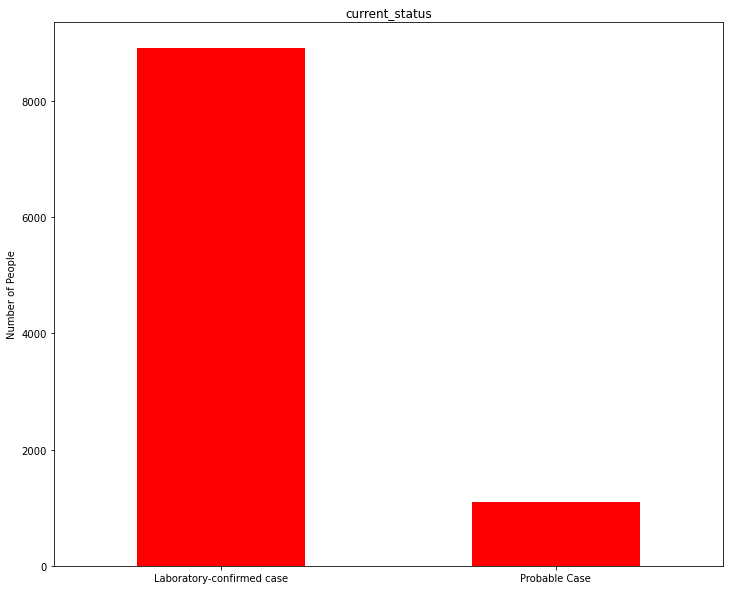

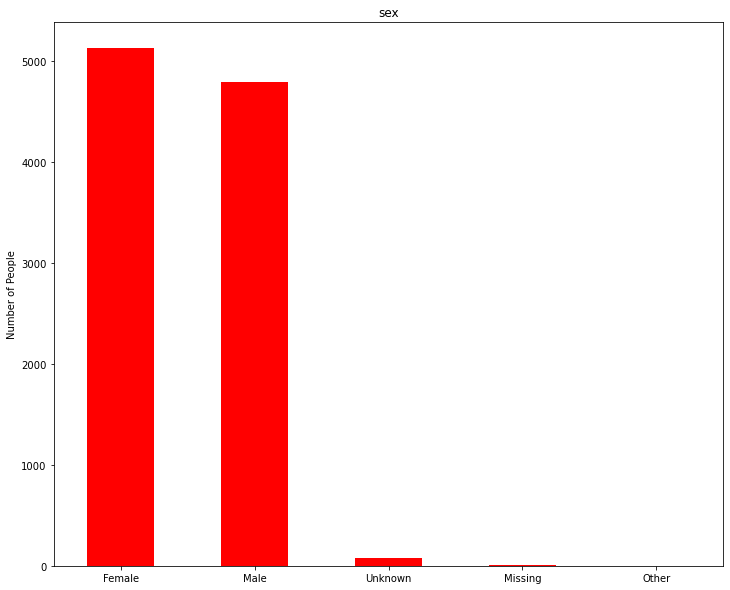

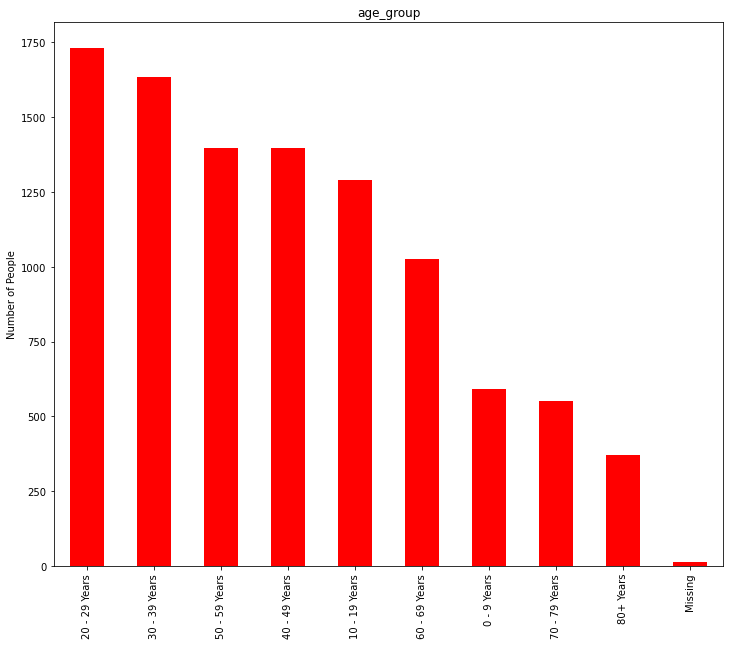

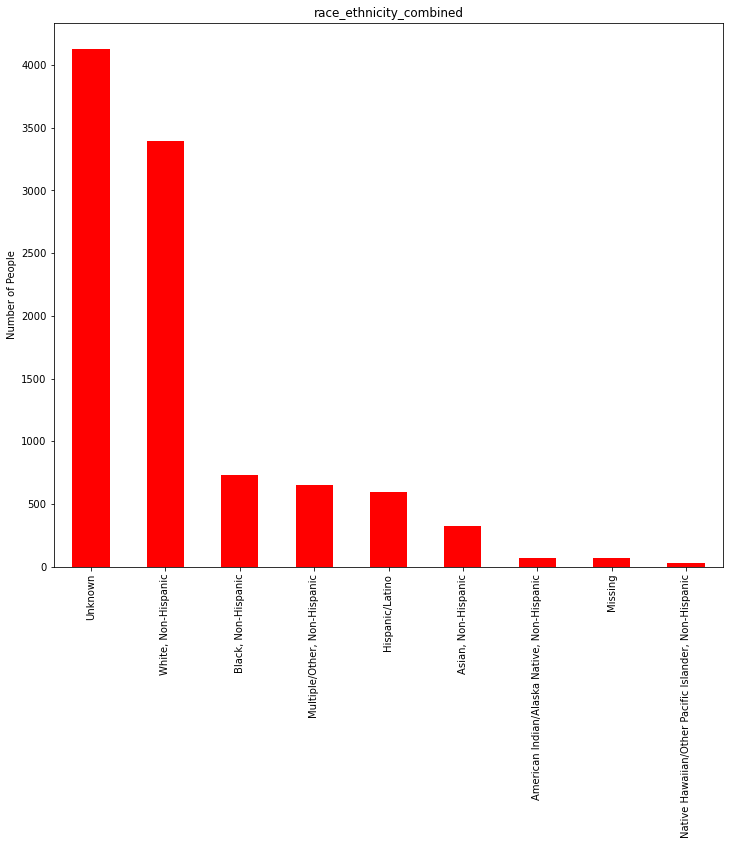

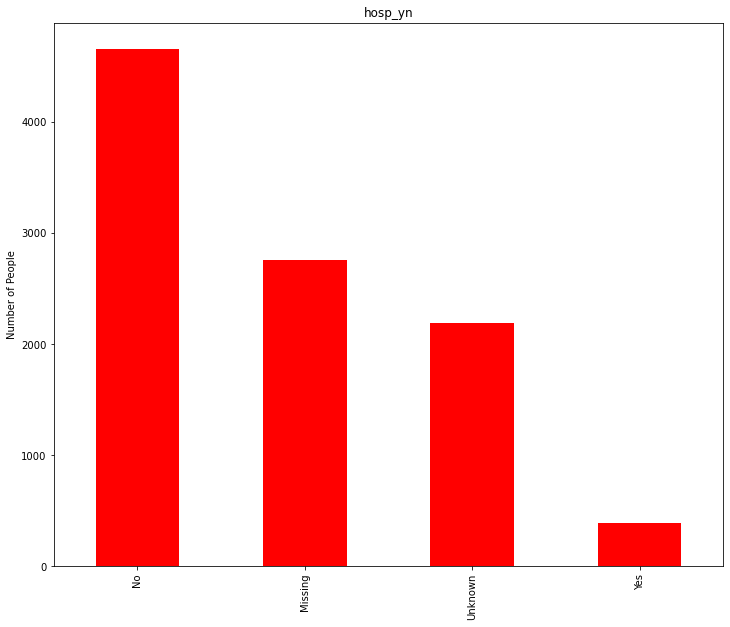

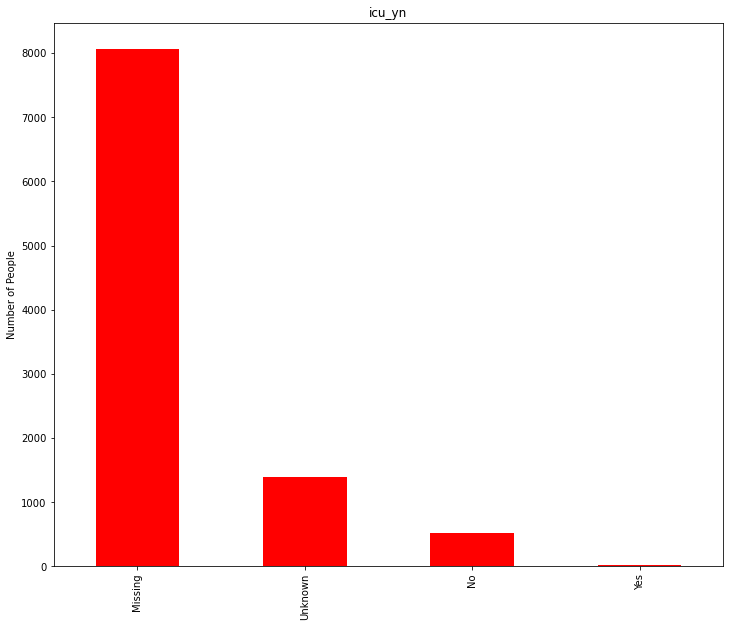

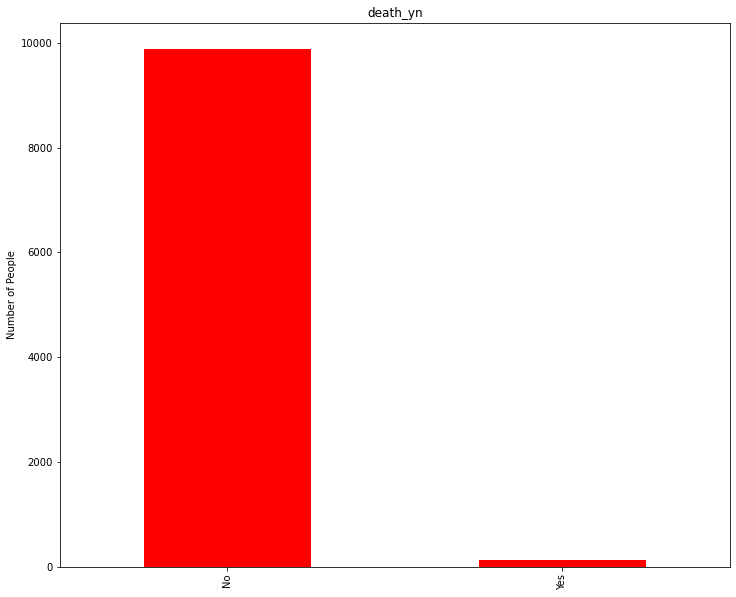

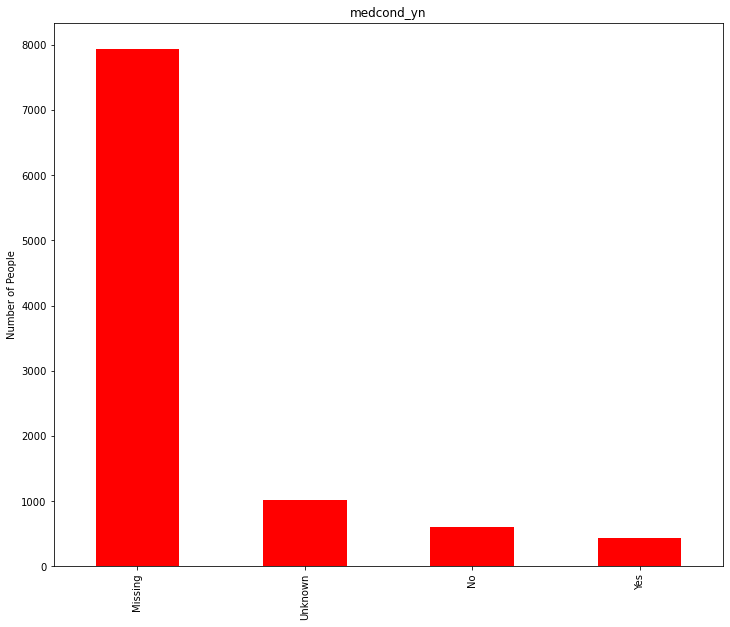

In [31]:
# Plot bar plots for all the catagorical features
for column in catFeat:
    if column == 'medcond_status' or column == 'death_status' or column == 'icu_status' or column == 'sex' or column == 'current_status' or column == 'hospital_status':
        f = df[column].value_counts().plot(kind='bar', figsize=(12,10), color='red')
        plt.title(column)
        plt.xticks(rotation=0)
        plt.ylabel('Number of People')
        plt.show()
        
    else:
        f = df[column].value_counts().plot(kind='bar', figsize=(12,10), color='red')
        plt.title(column)
        plt.ylabel('Number of People')
        plt.show()

# Data Quality Plan

<img style="float: left;" src="dataqualityplan.PNG">

# Data Understanding: Data Quality Plan for CSV file.


In this section, I will apply the data quality issues that is discussed above. This will be done in the order of each feature as listed in the Data Quality Plan. 

**cdc_earliest_case_dt:**
<br>
In this section we see that 34 rows were found that had dates that preceded cdc_report_dt, and 24 rows that preceded pos_spec_dt. We see below that cdc_case_earliest_dt matches dates with onset_dt. We assume that onset_dt is not an accurate feature to set to compare with other datetime features in the basis of dates occuring after onset_dt is illogical as we are under the assumption that pos_spec_dt will have earlier dates as it means there are workers who are asymptomatic or they are close contact with someone who tested positive. 
<br><br>
These rows will be imputed with the earliest dates taken from either cdc_report_dt or pos_spec_dt.

In [32]:
late_cdc_report = df[df['cdc_case_earliest_dt'] > df['cdc_report_dt']]
late_post_spec = df[df['cdc_case_earliest_dt'] > df['pos_spec_dt']]

In [33]:
print("The number of dates preceding cdc_report_dt:", late_cdc_report.shape[0])
print("The number of dates preceding pos_spec_dt:", late_post_spec.shape[0])

The number of dates preceding cdc_report_dt: 25
The number of dates preceding pos_spec_dt: 34


In [34]:
# Imputing the dates to cdc_case_earliest_dt from cdc_report_dt
new_cdc_report = late_cdc_report.assign(cdc_case_earliest_dt=late_cdc_report['cdc_report_dt'])

# Combining it to the dataframe and then checking for anymore dates that precedes pos_spec_dt and cdc_report_dt
df2 = df
df = new_cdc_report.combine_first(df2)

# Check by doing an integrity test
print("Number of rows preceding pos_spec_dt:", df[df['cdc_case_earliest_dt'] > df['pos_spec_dt']].shape[0])
print("Number of rows preceding cdc_report_dt:", df[df['cdc_case_earliest_dt'] > df['cdc_report_dt']].shape[0])

Number of rows preceding pos_spec_dt: 13
Number of rows preceding cdc_report_dt: 0


In [35]:
# Imputing the dates to cdc_case_earliest_dt from pos_spec_dt
tochange_pos_spec = df[df['cdc_case_earliest_dt'] > df['pos_spec_dt']]
new_spec_dt = tochange_pos_spec.assign(cdc_case_earliest_dt = tochange_pos_spec['pos_spec_dt'])

In [36]:
# Combining it to the dataframe and then checking for anymore dates that precedes pos_spec_dt and cdc_report_dt
df3 = df
df = new_spec_dt.combine_first(df3)

# Check by doing one last integrity test
print("Number of rows preceding pos_spec_dt:", df[df['cdc_case_earliest_dt'] > df['pos_spec_dt']].shape[0])
print("Number of rows preceding cdc_report_dt:", df[df['cdc_case_earliest_dt'] > df['cdc_report_dt']].shape[0])

Number of rows preceding pos_spec_dt: 0
Number of rows preceding cdc_report_dt: 0


**pos_spec_dt:**
<br>
In this section we will drop the feature as planned. We have finished imputating the data into cdc_case_earliest_dt. 

In [37]:
df.pop('pos_spec_dt')

0             NaT
1             NaT
2             NaT
3      2021-02-07
4             NaT
          ...    
9995          NaT
9996          NaT
9997          NaT
9998          NaT
9999          NaT
Name: pos_spec_dt, Length: 10000, dtype: datetime64[ns]

In [38]:
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021-01-22,2021-01-22,NaT,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021-01-26,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021-02-03,2021-02-05,2021-02-03,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021-02-05,2021-02-05,2021-02-05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021-01-27,2021-01-27,NaT,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


**onset_dt:**
<br>
In this section we will investigate the relation of the missing values to the target feature death_yn. If the feature proves to have a correlation with the target feature then we will create a missing indicator feature and drop onset_dt. We will investigate the likelihood of a patient's survival if they experienced symptoms. We will find the % and get a number of patients who have missing values of the onset_dt data and how many of these with a death_yn of yes. 

In [39]:
# Investigating the % of a patient with missing values resulting in death_yn of yes and no from onset_dt
rows_missing_onset = df[df['onset_dt'].isnull()]

rows_onset_missing_deathyes= rows_missing_onset.loc[rows_missing_onset['death_yn']=="Yes"]
percent_missing_deathyes = round(rows_onset_missing_deathyes.shape[0] / df.shape[0], 5)

rows_onset_missing_deathno = rows_missing_onset.loc[rows_missing_onset['death_yn']=="No"]
percent_missing_deathno = round(rows_onset_missing_deathno.shape[0] / df.shape[0], 5)

print("The % of patients resulting in death with missing values (death_yn yes of missing/total rows from onset_dt):", percent_missing_deathyes)
print("The % of patients resulting in no death with missing values (death_yn no of missing/total rows from onset_dt):", percent_missing_deathno)

The % of patients resulting in death with missing values (death_yn yes of missing/total rows from onset_dt): 0.0081
The % of patients resulting in no death with missing values (death_yn no of missing/total rows from onset_dt): 0.5757


In [40]:
# Investigating the % of a patient with onset_dt data (excluding missing values) resulting in death yes and no
rows_nonmiss_onset = df.dropna( how='any',subset=['onset_dt'])

rows_nonmiss_onset_deathyes= rows_nonmiss_onset.loc[rows_nonmiss_onset['death_yn']=="Yes"]
percent_deathyesn = round(rows_nonmiss_onset_deathyes.shape[0] / df.shape[0], 5)

rows_nonmiss_onset_deathno = rows_nonmiss_onset.loc[rows_nonmiss_onset['death_yn']=="No"]
percent_deathnon = round(rows_nonmiss_onset_deathno.shape[0] /df.shape[0], 5)

print("The % of patients resulting in death (death_yn yes /total rows from onset_dt):", percent_deathyesn)
print("The % of patients resulting in no death (death_yn no /total rows from onset_dt):", percent_deathnon)

The % of patients resulting in death (death_yn yes /total rows from onset_dt): 0.004
The % of patients resulting in no death (death_yn no /total rows from onset_dt): 0.4122


We see that the % of death_yn being yes with missing values is actually higher than deaths resulting in yes in non-missing values. This serves meaning to the data as it means there may be a correlation between patients who were asymptomatic and had resulted in death. To use this information I will create a missing indicator feature, add it to df and then drop onset_dt afterwards. 

In [41]:
df['onset_dt'].loc[~df['onset_dt'].isnull()] = 1  
df['onset_dt'].loc[df['onset_dt'].isnull()] = 0
df = df.rename(columns={"onset_dt": "onset_missing_ind"})

C:\Users\fayea\anaconda3\envs\comp20230\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**sex:**
<br>
We will investigate the feature its relation to the target feature and then drop the Missing rows as it only account for 0.1%.

In [42]:
# Investigating the % of a patient with sex data missing resulting in death yes and no
rows_miss_sex = df.loc[df['sex']=="Missing"]

rows_miss_sex_deathyes= rows_miss_sex .loc[rows_miss_sex['death_yn']=="Yes"]
percent_sex_deathyesn = round(rows_miss_sex_deathyes.shape[0] / df.shape[0], 5)

rows_miss_sex_deathno = rows_miss_sex .loc[rows_miss_sex['death_yn']=="No"]
percent_sex_deathnon = round(rows_miss_sex_deathno.shape[0] / df.shape[0], 5)

print("The % of patients resulting in death (death_yn yes /total rows from sex):", percent_sex_deathyesn)
print("The % of patients resulting in no death (death_yn no /total rows from sex):", percent_sex_deathnon)

The % of patients resulting in death (death_yn yes /total rows from sex): 0.0001
The % of patients resulting in no death (death_yn no /total rows from sex): 0.001


In [43]:
rows_nonmiss_sex = df[df.sex != "Missing"]

rows_nonmiss_sex_deathyes= rows_nonmiss_sex.loc[rows_nonmiss_sex['death_yn']=="Yes"]
percent_sex_deathyes = round(rows_nonmiss_sex_deathyes.shape[0] / df.shape[0], 5)

rows_nonmiss_sex_deathno = rows_nonmiss_sex.loc[rows_nonmiss_sex['death_yn']=="No"]
percent_sex_deathno = round(rows_nonmiss_sex_deathno.shape[0] / df.shape[0], 5)

print("The % of patients resulting in death (death_yn yes /total rows from onset_dt):", percent_sex_deathyes)
print("The % of patients resulting in no death (death_yn no /total rows from onset_dt):", percent_sex_deathno)

The % of patients resulting in death (death_yn yes /total rows from onset_dt): 0.012
The % of patients resulting in no death (death_yn no /total rows from onset_dt): 0.9869


Based from these results, we see no use of keeping these missing values and they will be dropped as they account for <.001% of the data against the target feature.

In [44]:
df = df[df.sex != "Missing"]

In [45]:
print("The number of rows to be dropped based from the feature sex containing 'Missing' values:", rows_miss_sex.shape[0])
print("The number of rows after dropping the rows that had these 'Missing' values:", df.shape[0])

The number of rows to be dropped based from the feature sex containing 'Missing' values: 11
The number of rows after dropping the rows that had these 'Missing' values: 9989


**age_group:**
<br>
In this section, I will investigate if the missing values of the feature has any impact on the target feature. Then, if it does not (assuming) then I will drop these rows. 

In [46]:
# Investigating the % of a patient with age_group data missing resulting in death yes and no
missing_age = df.loc[df['age_group']=="Missing"]

missing_age_deathyes = missing_age.loc[missing_age['death_yn']=="Yes"]
percent_age_deathyes = round(missing_age_deathyes.shape[0] / df.shape[0], 5)

missing_age_deathno = missing_age.loc[missing_age['death_yn']=="No"]
percent_age_deathno = round(missing_age_deathno.shape[0] / df.shape[0], 5)

print("The % of patients resulting in death (death_yn yes /total rows from sex):", percent_age_deathyes)
print("The % of patients resulting in no death (death_yn no /total rows from sex):", percent_age_deathno)

The % of patients resulting in death (death_yn yes /total rows from sex): 0.0
The % of patients resulting in no death (death_yn no /total rows from sex): 0.0012


Based on these results, we see that the missing values from age_group feature does not give any meaningful data as it the likelihood of death_yn == yes based on missing data is 0%. Therefore, these rows will be removed. 

In [47]:
df = df[df.age_group != "Missing"]

In [48]:
print("The number of rows to be dropped based from the feature sex containing 'Missing' values:", missing_age.shape[0])
print("The number of rows after dropping the rows that had these 'Missing' values:", df.shape[0])

The number of rows to be dropped based from the feature sex containing 'Missing' values: 12
The number of rows after dropping the rows that had these 'Missing' values: 9977


**race_ethnicity_combined:**
<br>
race_ethnicity_combined has 0.67% Missing values and over 40% of Unknown values. As mentioned in the introduction that Missing values in categorical values are not NaN values and they are coded to be Missing because they were left unanswered. 65 rows of the feature is Missing data. I will combine the Missing values into a single Unknown value. 

In [49]:
# Number of rows that is affected
df[df['race_ethnicity_combined'] == "Missing"].shape[0]

65

In [50]:
df['race_ethnicity_combined'] = df['race_ethnicity_combined'].replace(['Missing'], "Unknown")

In [51]:
df[df['race_ethnicity_combined'] == "Missing"].shape[0]

0

**hosp_yn:**
<br>
I will combine the Missing and Unknown into a single Unknown value.

In [52]:
df['hosp_yn'] = df['hosp_yn'].replace(['Missing'], "Unknown")

In [53]:
df[df['hosp_yn'] == "Missing"].shape[0]

0

**medcond_yn:**
<br>
As we cannot have Missing values, we will treat the 79% of Missing values as a valid Unknown value which already available to use in this scenario.

In [54]:
df['medcond_yn'] = df['medcond_yn'].replace(['Missing'], "Unknown")

In [55]:
print("Number of rows with Missing values:", df.loc[df['medcond_yn']=="Missing"].shape[0])

Number of rows with Missing values: 0


**icu_yn:**
<br>
From the documentation, we see that icu_yn lets us know if the patient ended up being referred to the ICU meaning that the patient's status will still be that they were hospitalized. I will investigate the % of hosp_yn == "Yes" that can be imputed if possible into Missing values. Then, combine the remaining Missing values with Unknown values.
<br><br>
After investigating below, I found that 201 rows can be imputed for Missing values in icu_yn. As it accounts for 2.5% of the Missing values and 2% from the total rows, imputation is possible. Imputation is valid in this scenario as ICU status still means that the patient is hospitalized. The only difference is that ICU patients can either be inpatients and outpatients which is out of the scope of the data and the dataset only focuses on a general view of the patient's status. The remaining Missing values will then be combined with Unknown as a single value. 

In [56]:
print("The number of rows before imputation for Missing values in icu_yn:",df.loc[df['icu_yn']=="Missing"].shape[0])

The number of rows before imputation for Missing values in icu_yn: 8051


In [57]:
# Creating a variable that only shows rows that contain Yes in hosp_yn. Then,
# see how many Yes rows can be filled in that has icu_yn == Missing
hosp_yes = df.loc[df['hosp_yn']=="Yes"]
hosp_yes

,cdc_case_earliest_dt,cdc_report_dt,onset_missing_ind,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
47,2021-02-02,2021-02-09,1,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,Yes,Missing,No,Unknown
85,2021-01-29,2021-01-29,1,Laboratory-confirmed case,Female,60 - 69 Years,"Black, Non-Hispanic",Yes,Unknown,No,Yes
86,2021-02-08,2021-02-08,1,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Yes,No,No,Unknown
96,2021-01-22,NaT,0,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Yes,Unknown,No,Unknown
99,2021-01-25,2021-01-28,1,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9930,2021-01-28,NaT,0,Laboratory-confirmed case,Male,80+ Years,Unknown,Yes,Unknown,No,Unknown
9933,2021-02-02,2021-02-02,1,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",Yes,Missing,No,Unknown
9935,2021-01-19,2021-01-19,0,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,Missing,No,Unknown
9948,2021-01-29,NaT,0,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,Unknown,No,Unknown


In [58]:
icu_missing_hosp_yes = hosp_yes.loc[hosp_yes['icu_yn']=="Missing"]
icu_missing_hosp_yes

,cdc_case_earliest_dt,cdc_report_dt,onset_missing_ind,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
47,2021-02-02,2021-02-09,1,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,Yes,Missing,No,Unknown
101,2021-01-25,2021-01-25,0,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Yes,Missing,No,Unknown
159,2021-02-08,2021-02-08,0,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,No,Unknown
287,2021-02-13,2021-02-15,0,Laboratory-confirmed case,Female,30 - 39 Years,"Asian, Non-Hispanic",Yes,Missing,No,Unknown
292,2021-01-28,2021-01-31,1,Laboratory-confirmed case,Female,40 - 49 Years,"Black, Non-Hispanic",Yes,Missing,No,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
9735,2021-01-26,2021-01-26,0,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Missing,Yes,Unknown
9804,2021-01-29,2021-01-29,0,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Missing,No,Yes
9907,2021-02-10,2021-02-11,0,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Yes,Missing,No,Unknown
9933,2021-02-02,2021-02-02,1,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",Yes,Missing,No,Unknown


In [59]:
new_icu_hosp_yes = icu_missing_hosp_yes.assign(icu_yn = icu_missing_hosp_yes['hosp_yn'])
new_icu_hosp_yes

,cdc_case_earliest_dt,cdc_report_dt,onset_missing_ind,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
47,2021-02-02,2021-02-09,1,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,Yes,Yes,No,Unknown
101,2021-01-25,2021-01-25,0,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Yes,Yes,No,Unknown
159,2021-02-08,2021-02-08,0,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,Yes,No,Unknown
287,2021-02-13,2021-02-15,0,Laboratory-confirmed case,Female,30 - 39 Years,"Asian, Non-Hispanic",Yes,Yes,No,Unknown
292,2021-01-28,2021-01-31,1,Laboratory-confirmed case,Female,40 - 49 Years,"Black, Non-Hispanic",Yes,Yes,No,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
9735,2021-01-26,2021-01-26,0,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Yes,Yes,Unknown
9804,2021-01-29,2021-01-29,0,Laboratory-confirmed case,Female,50 - 59 Years,"Black, Non-Hispanic",Yes,Yes,No,Yes
9907,2021-02-10,2021-02-11,0,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Yes,Yes,No,Unknown
9933,2021-02-02,2021-02-02,1,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",Yes,Yes,No,Unknown


In [60]:
df4 = df
df = new_icu_hosp_yes.combine_first(df4)
print("The number of rows after imputation for Missing values in icu_yn:", df.loc[df['icu_yn']=="Missing"].shape[0])

The number of rows after imputation for Missing values in icu_yn: 7850


In [61]:
#Lastly, combining the remaining Missing values to Unknown.
df['icu_yn'] = df['icu_yn'].replace(['Missing'], "Unknown")
print("Number of rows with Missing values:", df.loc[df['icu_yn']=="Missing"].shape[0])

Number of rows with Missing values: 0


**cdc_report_dt:**
<br>
Drop the column as it is depreceated according to the cdc_report documentation.

In [62]:
df.pop('cdc_report_dt')
df.head(10)

,cdc_case_earliest_dt,onset_missing_ind,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021-01-22,0,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Unknown,No,Unknown
1,2021-01-26,0,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
2,2021-02-03,1,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Unknown,Unknown,No,Unknown
3,2021-02-05,1,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021-01-27,0,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Unknown,No,Unknown
5,2021-02-07,0,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
6,2021-01-26,0,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Unknown,Unknown,No,Unknown
7,2021-02-04,0,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Unknown,Unknown,No,Unknown
8,2021-01-23,0,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Unknown,No,Unknown
9,2021-01-25,1,Probable Case,Female,70 - 79 Years,"White, Non-Hispanic",No,Unknown,No,Unknown


In [63]:
df.isnull().sum()

cdc_case_earliest_dt       0
onset_missing_ind          0
current_status             0
sex                        0
age_group                  0
race_ethnicity_combined    0
hosp_yn                    0
icu_yn                     0
death_yn                   0
medcond_yn                 0
dtype: int64

In [64]:
# Saving the cleaned dataset to a new csv file. This will be used for the second assignment.
df.to_csv('24032021-covid19-cdc-deathyn-recent-10k_CLEANED.csv', index=False)